In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train[0].shape

(28, 28)

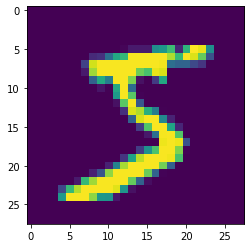

In [12]:
plt.imshow(x_train[0])

In [13]:
y_train[0]

5

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_example = to_categorical(y_train)
y_example.shape

(60000, 10)

In [17]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [19]:
y_cat_train = to_categorical(y_train,10)

In [20]:
x_train = x_train/255

In [21]:
x_test = x_test/255

In [23]:
scaled_image=x_train[0]

In [24]:
scaled_image.max()

1.0

In [25]:
#RESHAPE 
#let CNN know its single layer
#RGB huda 3 hunthyo

In [26]:
#batch_size, width, heigh, color_channels
x_train = x_train.reshape(60000,28,28,1)

In [27]:
x_train.shape

(60000, 28, 28, 1)

In [28]:
x_test = x_test.reshape(10000,28,28,1)

### Creating + Training 

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [36]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1),padding='valid',input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

#output, SOFTMAX- MULIPCLASS
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor = 'val_loss', patience=1)

In [40]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test,y_cat_test), callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 291us/sample - loss: 0.1347 - accuracy: 0.9606 - val_loss: 0.0531 - val_accuracy: 0.9826
Epoch 2/10
60000/60000 [==============================] - 17s 285us/sample - loss: 0.0456 - accuracy: 0.9863 - val_loss: 0.0382 - val_accuracy: 0.9863
Epoch 3/10
60000/60000 [==============================] - 18s 298us/sample - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0392 - val_accuracy: 0.9859


In [41]:
metrics = pd.DataFrame(model.history.history)

In [42]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.134701,0.960567,0.053090,0.9826
1,0.045611,0.986267,0.038172,0.9863
2,0.029261,0.990800,0.039176,0.9859


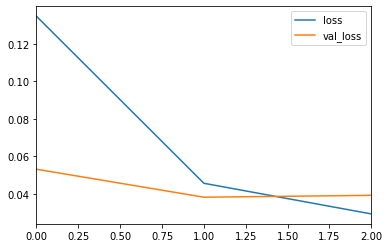

In [43]:
metrics[['loss','val_loss']].plot()

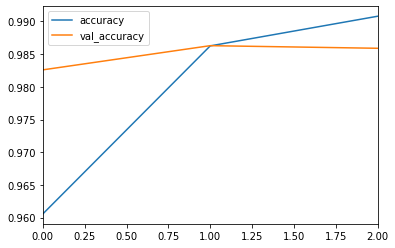

In [45]:
metrics[['accuracy','val_accuracy']].plot()

In [47]:
model.evaluate(x_test, y_cat_test,verbose=0)

[0.03917559649460017, 0.9859]

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
predictions = model.predict_classes(x_test)
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [50]:
y_cat_test.shape

(10000, 10)

In [51]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       1.00      0.97      0.98       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.96      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [54]:
confusion_matrix(y_test, predictions)

array([[ 972,    0,    1,    1,    0,    0,    3,    0,    3,    0],
       [   0, 1127,    1,    1,    0,    0,    3,    1,    2,    0],
       [   2,    1, 1017,    0,    1,    0,    3,    3,    4,    1],
       [   0,    0,    5,  993,    0,    8,    0,    1,    2,    1],
       [   2,    0,    0,    0,  953,    0,    6,    2,    6,   13],
       [   2,    0,    0,    4,    0,  881,    2,    0,    3,    0],
       [   4,    1,    0,    0,    1,    1,  949,    0,    2,    0],
       [   1,    0,    7,    2,    0,    1,    0, 1010,    5,    2],
       [   4,    0,    3,    2,    0,    0,    0,    0,  964,    1],
       [   0,    1,    0,    0,    1,    3,    0,    2,    9,  993]])

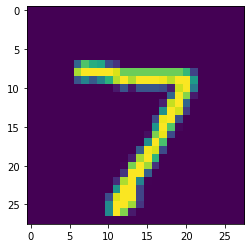

In [56]:
#PREDIC
my_number = x_test[0]
plt.imshow(my_number.reshape(28,28))

In [57]:
#num_images, width, height, color,channel
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])